In [8]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, log_loss, roc_curve, auc

In [9]:
adata = sc.read("../data/3-OLINK_data_sub_train.h5ad")
adata_test = sc.read("../data/3-OLINK_data_sub_test.h5ad")

In [10]:
data = pd.read_csv("../data/3-OLINK_data_sub_train_norm.csv")
data_test = pd.read_csv("../data//3-OLINK_data_sub_test_norm.csv")

In [12]:
data=data.set_index('Id')
data_test=data_test.set_index('Id')

In [13]:
data

,EIF4EBP1,EIF4G1,EIF5A,ENAH,ENG,ENPP2,ENPP5,ENPP7,ENTPD5,EGLN1,...,CHCHD6,CHM,CHP1,CHMP6,CHMP1A,CHGB,CHGA,CHRM1,KLK1,WFDC2
Id,,,,,,,,,,,,,,,,,,,,,
4345870,0.724747,0.193398,0.709988,0.491867,0.771465,0.712243,0.620365,0.165960,0.870023,0.481566,...,0.629430,0.311242,0.219170,0.350386,0.379996,0.502822,0.294713,0.609684,0.101737,0.612391
4470636,0.202809,0.099662,0.809039,0.442721,0.807165,0.633537,0.621622,0.535556,0.829270,0.459525,...,0.654139,0.510623,0.485642,0.420387,0.189922,0.524719,0.367232,0.592477,0.171893,0.917702
3236504,0.434471,0.538157,0.654836,0.519014,0.607882,0.474799,0.000000,0.000000,0.722016,0.432671,...,0.543650,0.552108,0.428443,0.706836,0.743031,0.392461,0.242161,0.472575,0.137755,0.452206
3306041,0.432549,0.313378,0.664103,0.525573,0.766192,0.496753,0.571659,0.212880,0.647865,0.434894,...,0.647286,0.697134,0.355043,0.502205,0.468159,0.457395,0.290437,0.597747,0.205844,0.578509
3306375,0.472101,0.768591,0.620799,0.549395,0.689148,0.403333,0.453147,0.841084,0.823912,0.498163,...,0.670775,0.510548,0.659560,0.954751,0.909584,0.535415,0.598397,0.494362,0.562428,0.634838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5224082,0.483224,0.524163,0.609242,0.503507,0.814350,0.775715,0.491652,0.781506,0.806049,0.424962,...,0.690605,0.526064,0.535940,0.515838,0.996881,0.857179,0.598735,0.917839,0.616920,0.732274
1887434,0.376776,0.190302,0.424855,0.301992,0.759570,0.726096,0.476135,0.145891,0.615289,0.348695,...,0.486982,0.510548,0.461127,0.310804,0.218098,0.568802,0.335677,0.364768,0.175041,0.506046
3205452,0.467452,0.431559,0.723379,0.600583,0.820330,0.587739,0.665996,0.392217,0.768669,0.639163,...,0.552464,0.471690,0.498062,0.540529,0.492446,0.384726,0.320614,0.578321,0.149153,0.533744


In [14]:
data_test

,EIF4EBP1,EIF4G1,EIF5A,ENAH,ENG,ENPP2,ENPP5,ENPP7,ENTPD5,EGLN1,...,CHCHD6,CHM,CHP1,CHMP6,CHMP1A,CHGB,CHGA,CHRM1,KLK1,WFDC2
Id,,,,,,,,,,,,,,,,,,,,,
4228635,0.604328,0.694501,0.519439,0.534292,0.663294,0.922466,0.492302,0.552941,0.693868,0.472083,...,0.678808,0.780013,0.593828,0.736332,0.781566,0.417739,0.386396,0.708742,0.188918,0.535593
1763478,0.315606,0.161763,0.626951,0.525020,0.754487,0.565872,0.624633,0.339648,0.642954,0.462218,...,0.615919,0.309365,0.452858,0.329902,0.210100,0.587931,0.343538,0.625411,0.206638,0.438063
1611073,0.301986,0.189747,0.703800,0.425139,0.785088,0.863230,0.471514,0.355175,0.766159,0.310591,...,0.693226,0.435135,0.309700,0.516252,0.365353,0.607799,0.494354,0.621476,0.219962,0.523348
1057039,0.499012,0.410316,0.697308,0.677699,0.690342,0.606945,0.594402,0.456704,0.832922,0.549048,...,0.695581,0.470810,0.488831,0.525478,0.562293,0.497291,0.366603,0.592388,0.188781,0.611422
2018635,0.634797,0.334489,0.749194,0.503788,0.804898,0.553724,0.666446,0.392688,0.761459,0.340272,...,0.616359,0.000000,0.240676,0.536673,0.352702,0.447921,0.334023,0.000000,0.149338,0.416285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275089,0.457837,0.585462,0.785211,0.656410,0.789744,0.601417,0.319303,0.613417,0.801536,0.643714,...,0.619805,0.380190,0.354491,0.495572,0.560627,0.500207,0.356756,0.527190,0.131363,0.566514
1436569,0.459881,0.488294,0.801966,0.596325,0.826522,0.698768,0.483142,0.577003,0.807544,0.511195,...,0.711556,0.514580,0.375154,0.596180,0.560038,0.767735,0.416016,0.636255,0.634941,0.665161
4986938,0.636026,0.652038,0.620170,0.624984,0.861898,0.945913,0.488080,0.562887,0.817068,0.595588,...,0.662430,0.530463,0.406851,0.754700,0.498461,0.698419,0.709513,0.451079,0.179369,0.594958


找出索引的交集和差异

In [15]:
index_data = data.index
index_data_test = data_test.index

common_index = index_data.intersection(index_data_test)
common_index

Index([], dtype='int64', name='Id')

In [16]:
pred = adata.obs['sex']
pred_test = adata_test.obs['sex']

In [17]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# sns.pairplot(data, hue='target')
# plt.show()

In [18]:
# 分割数据为训练集和测试集
X_train, X_val, y_train, y_val = train_test_split(data, pred, test_size=0.3, random_state=0)

In [19]:
model = LogisticRegression(
        # penalty = None,
        # solver = 'newton-cg',
        max_iter=1000
)

In [20]:
# initial_weights = model.coef_ if model.coef_ is not None else np.zeros(X_train.shape[1])

In [21]:
# model = LogisticRegression(max_iter=1, warm_start=True)  # 使用warm_start=True以便多次调用fit方法

# # 记录每次迭代的损失值
# losses = []

# for i in range(1, 21):  # 假设我们进行100次迭代
#     model.max_iter = i
#     model.fit(X_train, y_train)
#     y_val_pred_proba = model.predict_proba(X_val)
#     loss = log_loss(y_val, y_val_pred_proba)
#     losses.append(loss)

# # 绘制损失值
# plt.plot(range(1, 21), losses, marker='o')
# plt.xlabel('Iteration')
# plt.ylabel('Log Loss')
# plt.title('Log Loss vs. Iteration')
# plt.grid(True)
# plt.show()

In [22]:
# cv_scores = cross_val_score(model, X_train, y_train, cv=5)

# # 打印交叉验证分数
# print(f"交叉验证准确率: {cv_scores}")
# # print(f"平均交叉验证准确率: {cv_scores.mean()}"

In [23]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [24]:
# 获取实际收敛的迭代次数
actual_iterations = model.n_iter_[0]

print("实际收敛的迭代次数: ", actual_iterations)

实际收敛的迭代次数:  17


In [25]:
# 获取训练后的权重
weights = model.coef_

print(weights.shape)

# 展示权重矩阵
print("weights after training: ", weights)

# 展平权重矩阵并找出最大值的位置
num_top_weights = 10  # 你想找出的最大值数量
flat_weights = weights.flatten()
top_indices = np.argpartition(flat_weights, -num_top_weights)[-num_top_weights:]
top_indices_sorted = top_indices[np.argsort(-flat_weights[top_indices])]

# 显示最大值及其位置
print("Top {} weight and position:".format(num_top_weights))
for idx in top_indices_sorted:
    position = np.unravel_index(idx, weights.shape)
    print("position: {}, weight: {:.4f}".format(position, flat_weights[idx]))

(1, 2919)
weights after training:  [[-0.06148219  0.01003283  0.01670873 ...  0.02705703  0.00161073
   0.07712169]]
Top 10 weight and position:
position: (0, 990), weight: 2.1529
position: (0, 1485), weight: 1.8438
position: (0, 1894), weight: 1.6657
position: (0, 2883), weight: 1.4239
position: (0, 454), weight: 1.3769
position: (0, 2525), weight: 1.3668
position: (0, 904), weight: 1.2319
position: (0, 415), weight: 1.0531
position: (0, 2740), weight: 1.0401
position: (0, 1715), weight: 0.9692


In [26]:
data.columns[top_indices_sorted]

Index(['SPINT3', 'INSL3', 'KLK3', 'EDDM3B', 'PSPN', 'ACRV1', 'TEX101', 'PROK1',
       'CRISP2', 'MMP3'],
      dtype='object')

In [27]:
y_pred = model.predict(X_val)
acc= accuracy_score(y_val, y_pred)
print(acc)

0.9988512349224583


In [28]:
y_test_pred = model.predict(data_test)
y_test_pred_proba = model.predict_proba(data_test)[:, 1]

acc= accuracy_score(pred_test, y_test_pred)
print(acc)

0.9975874547647768


In [30]:
# 评估模型性能
accuracy = accuracy_score(pred_test, y_test_pred)
conf_matrix = confusion_matrix(pred_test, y_test_pred)
class_report = classification_report(pred_test, y_test_pred)

print(f"Validation Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Validation Accuracy: 0.9975874547647768
Confusion Matrix:
 [[1402    1]
 [   5 1079]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1403
           1       1.00      1.00      1.00      1084

    accuracy                           1.00      2487
   macro avg       1.00      1.00      1.00      2487
weighted avg       1.00      1.00      1.00      2487



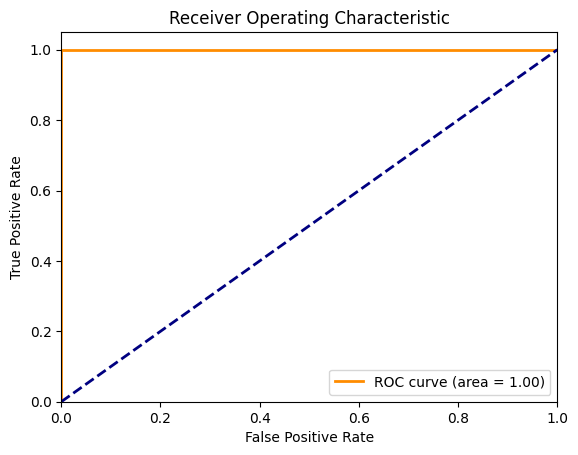

In [31]:
# 绘制ROC曲线
fpr, tpr, _ = roc_curve(y_test_pred, y_test_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Feature 990     2.152854
Feature 1485    1.843777
Feature 1894    1.665652
Feature 557     1.528767
Feature 2883    1.423941
Feature 454     1.376912
Feature 2525    1.366833
Feature 2834    1.317156
Feature 1673    1.265507
Feature 904     1.231865
dtype: float64


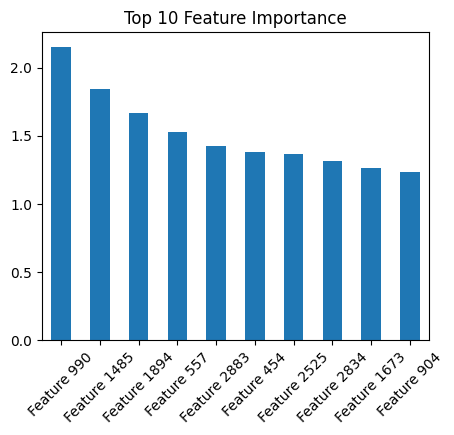

In [32]:
# 特征重要性分析
feature_importance = pd.Series(model.coef_[0], index=[f"Feature {i}" for i in range(data.shape[1])])

# 只显示最重要的10个特征
top_features = feature_importance.abs().sort_values(ascending=False).head(10)
top_features = top_features.sort_values(ascending=False)

print(top_features)

# 可视化特征的重要性
plt.figure(figsize=(5, 4))
top_features.plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Top 10 Feature Importance')
plt.show()

In [33]:
top_feature_indices = top_features.index
top_feature_indices = [int(feat.split()[1]) for feat in top_feature_indices]

data.columns[top_feature_indices]

Index(['SPINT3', 'INSL3', 'KLK3', 'LEP', 'EDDM3B', 'PSPN', 'ACRV1', 'CGA',
       'FSHB', 'TEX101'],
      dtype='object')

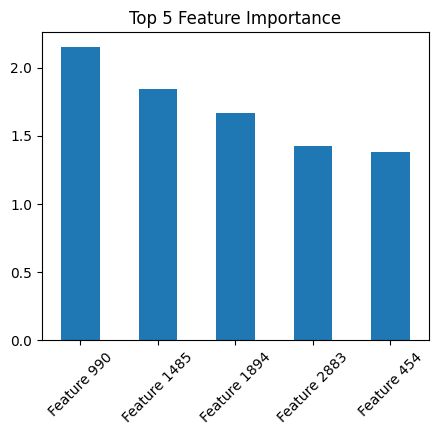

In [34]:
# 找到特征的增加会增加预测为正类的概率的前5个特征
positive_influence_features = feature_importance.sort_values(ascending=False).head(5)


# 可视化特征的重要性
plt.figure(figsize=(5, 4))
positive_influence_features.plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Top 5 Feature Importance')
plt.show()

In [35]:
positive_influence_features_indices = positive_influence_features.index
positive_influence_features_indices = [int(feat.split()[1]) for feat in positive_influence_features_indices]

data.columns[positive_influence_features_indices]

Index(['SPINT3', 'INSL3', 'KLK3', 'EDDM3B', 'PSPN'], dtype='object')

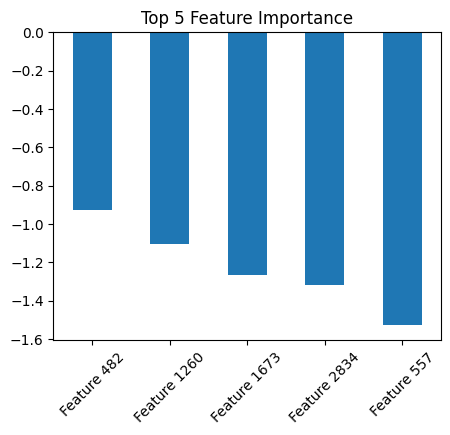

In [36]:
# 找到特征的增加会减少预测为负类的概率的前5个特征
negative_influence_features = feature_importance.sort_values(ascending=False).tail(5)

# 可视化特征的重要性
plt.figure(figsize=(5, 4))
negative_influence_features.plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Top 5 Feature Importance')
plt.show()

In [37]:
negative_influence_features_indices = negative_influence_features.index
negative_influence_features_indices = [int(feat.split()[1]) for feat in negative_influence_features_indices]

data.columns[negative_influence_features_indices]

Index(['XG', 'PZP', 'FSHB', 'CGA', 'LEP'], dtype='object')